<a href="https://colab.research.google.com/github/ParasCanCode/Image-Classifier/blob/master/Classify_HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [32]:
#Load data and split 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [62]:
print("Number of training images",x_train.shape)
print("Number of testing images",x_test.shape)
print("Number of training labels",y_train.shape)
print("Number of testing labels",y_test.shape)

Number of training images (60000, 28, 28, 1)
Number of testing images (10000, 28, 28, 1)
Number of training labels (60000, 10)
Number of testing labels (10000, 10)


0


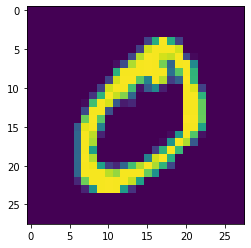

In [6]:
plt.imshow(x_train[1])
print(y_train[1])

In [33]:
#Reshape training and testing images
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [27]:
#x_train = x_train/255
#x_test = x_test/255

In [34]:
#One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
model = Sequential()

model.add(Conv2D(64,3,activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(32,3,activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))

In [36]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

In [49]:
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.1008 - val_accuracy: 0.9727
Epoch 2/3
60000/60000 [==============================] - 173s 3ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.1006 - val_accuracy: 0.9761
Epoch 3/3
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.0895 - val_accuracy: 0.9788


Text(0, 0.5, 'Accuracy')

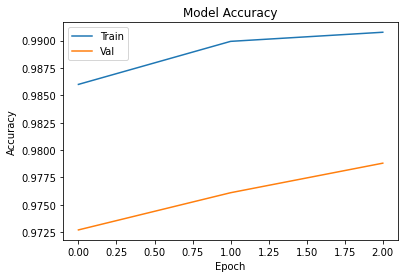

In [50]:
#Visualise the accuracy results
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Val'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
#plt.show()

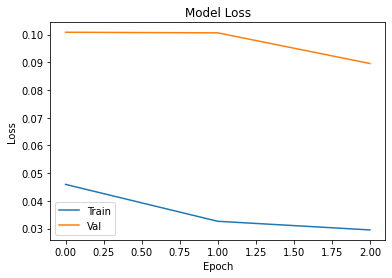

In [51]:
#Visualise the loss results
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train','Val'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

TypeError: ignored

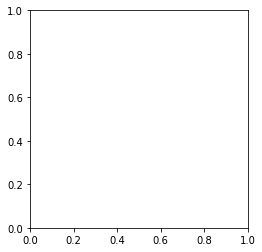

In [89]:
plt.imshow(x_test[0])

In [86]:
predictions = model.predict(x_test)

In [91]:
predictions[0]

array([2.3432634e-13, 3.0820499e-23, 2.2699592e-14, 7.9676994e-11,
       3.6525008e-19, 3.1128899e-15, 1.4379428e-21, 1.0000000e+00,
       7.2467438e-16, 4.9197118e-12], dtype=float32)

In [80]:
from google.colab import files
uploaded = files.upload()

Saving hand_digit0.jpeg to hand_digit0.jpeg


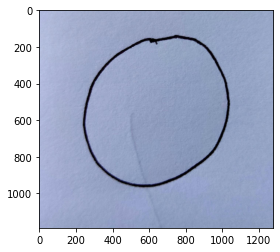

In [81]:
img = plt.imread("hand_digit0.jpeg")
plt.imshow(img)

In [82]:
from skimage.transform import resize
newImg = resize(img,(28,28,1))
#plt.show(newImg)

In [83]:
predictions = model.predict(np.array([newImg]))

In [84]:
predictions

array([[0.02741738, 0.07662913, 0.3019959 , 0.05586185, 0.21042112,
        0.08010416, 0.05869441, 0.10855465, 0.04239203, 0.03792934]],
      dtype=float32)

In [85]:
predictions.max()

0.3019959